In [4]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline


import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# DATA CLEANING

In [5]:
ames = pd.read_csv("train.csv")


Dropping Columns irrelvant to question presented



In [6]:
df = ames[[u'Id', u'LotArea', u'Utilities', u'Neighborhood', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'GrLivArea', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'MoSold', u'YrSold',
       u'SalePrice']]

In [7]:
# Rename Columns
df = df.rename(columns= {'LotArea':'Lot', 'Utilities':'Util','Neighborhood':'Hood',\
                    'HouseStyle':'Style','OverallQual':'Quality','OverallCond':'Condition',\
                    'YearRemodAdd':'YearRemod',\
                    'GrLivArea':'AbvGroundLiv','MoSold':'MonthSold','YrSold':'YearSold'})

df.head(4)

,Id,Lot,Util,Hood,BldgType,Style,Quality,Condition,YearBuilt,YearRemod,RoofStyle,RoofMatl,AbvGroundLiv,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MonthSold,YearSold,SalePrice
0,1,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,1710,2,1,3,1,2,2008,208500
1,2,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1262,2,0,3,1,5,2007,181500
2,3,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,1786,2,1,3,1,9,2008,223500
3,4,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,1717,1,0,3,1,2,2006,140000


## Locating Missing Values: None Detected

In [8]:
df.isnull().sum()

Id              0
Lot             0
Util            0
Hood            0
BldgType        0
Style           0
Quality         0
Condition       0
YearBuilt       0
YearRemod       0
RoofStyle       0
RoofMatl        0
AbvGroundLiv    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
MonthSold       0
YearSold        0
SalePrice       0
dtype: int64

### CREATING NEW VARIABLES

In [10]:
df['Hood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [12]:
#Create neighborhood map
#NOrth ; NoRidge, Veenker, sommerset,'NridgHt', 'NAmes', \
  #...'Gilbert','StoneBr', 'ClearCr', 'Blmngtn', 'BrDale'
# East:  'Crawfor' 'OldTown' 'BrkSide' , 'IDOTRR', 'Timber'
#West: NWAmes, 'Sawyer', 'SawyerW, 'Edwards', 'NPkVill', 'Blueste'
#South: Mitchell, 'MeadowV'
#Center: 'SWISU'
df["Hood"].unique()

# North  = df[(df['Hood'] == 'NoRidge') | (df['Hood'] == 'Veenker') |(df['Hood'] == 'Somerst')| (df['Hood'] == 'NridgHt') | (df['Hood'] == 'NAmes')\
# (df['Hood'] == 'Gilbert') | (df['Hood'] == 'StoneBr' ) |(df['Hood'] == 'ClearCr')|(df['Hood'] == 'Blmngtn' ) |(df['Hood'] =='BrDale')]

# East = df[(df['Hood'] == 'Crawfor') | (df['Hood'] == 'OldTown' ) |(df['Hood'] == 'BrkSide')| (df['Hood'] == 'IDOTRR') | (df['Hood'] == 'Timber')]  

# West = df[(df['Hood'] == 'NWAmes') | (df['Hood'] == 'Sawyer' ) |(df['Hood'] == 'SawyerW')| (df['Hood'] == 'Edwards') | (df['Hood'] == 'NPkVill')|(df['Hood'] == 'Blueste')]

# South = df[(df['Hood'] == 'Mitchell') | (df['Hood'] == 'MeadowV' )]

# Center = df[(df['Hood'] == 'SWISU')] 

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [13]:
df['Center'] = np.where(df['Hood'] == 'SWISU', 'yes', 'no')

In [14]:
df['North']= np.where((df['Hood'] == 'Crawfor') | (df['Hood'] == 'OldTown' ) |(df['Hood'] == 'BrkSide')| (df['Hood'] == 'IDOTRR') | (df['Hood'] == 'Timber'), 'yes','no')  



In [15]:
df['East'] = np.where((df['Hood'] == 'Crawfor') | (df['Hood'] == 'OldTown' ) |(df['Hood'] == 'BrkSide')| (df['Hood'] == 'IDOTRR') | (df['Hood'] == 'Timber'), 'yes', 'no')  


In [16]:
df['West'] = np.where((df['Hood'] == 'NWAmes') | (df['Hood'] == 'Sawyer' ) |(df['Hood'] == 'SawyerW')| (df['Hood'] == 'Edwards') | (df['Hood'] == 'NPkVill')|(df['Hood'] == 'Blueste'), 'yes','no')



In [17]:
df['South'] = np.where((df['Hood'] == 'Mitchell') | (df['Hood'] == 'MeadowV' ), 'yes', 'no')

In [18]:
df['NoRidge'] = np.where((df['Hood'] == 'NoRidge'), 'yes', 'no')

df['Edwards'] = np.where((df['Hood'] == 'Edwards'),'yes', 'no')

In [19]:
###Concating DUMMy NEW VARIABLES

#df = pd.concat(df, [df[['North']], df[['South']], df[['East']], df[['West']],df[['Center']]], axis=1)
#df = pd.concat(df, pd.get_dummies([df['North'], df['South'], df['East'], df['West'],df['Center']], axis=1)


# areas = ['North', 'South', 'East', 'West', 'Center', 'NoRidge', 'Edwards']

# for area in areas:
#     df = pd.concat([df, pd.get_dummies(df[[area]], drop_first=True)], axis=1)


# df = pd.concat([df, pd.get_dummies(df[['North']], drop_first=True)], axis=1)
# df = pd.concat([df, pd.get_dummies(df[['South']], drop_first=True)], axis=1)
# df = pd.concat([df, pd.get_dummies(df[['East']], drop_first=True )], axis=1)
# df = pd.concat([df, pd.get_dummies(df[['West']], drop_first=True)], axis=1)
# df = pd.concat([df, pd.get_dummies(df[['Center']], drop_first=True)], axis=1)
# df = pd.concat([df, pd.get_dummies(df[['NoRidge']], drop_first=True)], axis=1)
# df = pd.concat([df, pd.get_dummies(df[['Edwards']], drop_first=True)], axis=1)







In [20]:
df.head()

,Id,Lot,Util,Hood,BldgType,Style,Quality,Condition,YearBuilt,YearRemod,...,MonthSold,YearSold,SalePrice,Center,North,East,West,South,NoRidge,Edwards
0,1,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,...,2,2008,208500,no,no,no,no,no,no,no
1,2,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,...,5,2007,181500,no,no,no,no,no,no,no
2,3,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,...,9,2008,223500,no,no,no,no,no,no,no
3,4,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,...,2,2006,140000,no,yes,yes,no,no,no,no
4,5,14260,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,...,12,2008,250000,no,no,no,no,no,yes,no


### INITIAL DATA EXPLORATION

In [21]:
df.dtypes

Id               int64
Lot              int64
Util            object
Hood            object
BldgType        object
Style           object
Quality          int64
Condition        int64
YearBuilt        int64
YearRemod        int64
RoofStyle       object
RoofMatl        object
AbvGroundLiv     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
MonthSold        int64
YearSold         int64
SalePrice        int64
Center          object
North           object
East            object
West            object
South           object
NoRidge         object
Edwards         object
dtype: object

In [22]:
df['YearSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YearSold, dtype: int64

In [23]:
#Utilities has only one observation without All Public Utilities. Consider Removing
df["Util"].value_counts()

AllPub    1459
NoSeWa       1
Name: Util, dtype: int64

In [24]:
df = df.drop('Util', axis = 1)

In [25]:
#Several Different Value Counts. Consider tansforming to Categorical/Dummy Values
df["Hood"].value_counts().head()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Hood, dtype: int64

In [26]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [27]:
df = df[df['BldgType'] == '1Fam']

#df = df.drop('BldgType', axis = 1)

In [28]:
df['Style'].value_counts()

1Story    607
2Story    362
1.5Fin    142
SLvl       60
SFoyer     20
1.5Unf     13
2.5Unf      9
2.5Fin      7
Name: Style, dtype: int64

In [29]:
df = df[(df['Style'] == '1Story')| (df['Style'] == '2Story')]

In [30]:
df['Quality'].value_counts()

5     246
7     233
6     218
8     135
4      67
9      37
10     16
3      12
2       3
1       2
Name: Quality, dtype: int64

In [31]:
df['RoofStyle'].value_counts()

Gable      713
Hip        233
Flat        10
Gambrel      7
Mansard      5
Shed         1
Name: RoofStyle, dtype: int64

In [32]:
df = df[(df['RoofStyle'] == 'Gable')| (df['RoofStyle'] == 'Hip')]

Condition Ordered Categorical Variable

In [33]:
df['Condition'].value_counts()

5    569
6    157
7    124
8     43
4     22
3     15
9     11
2      4
1      1
Name: Condition, dtype: int64

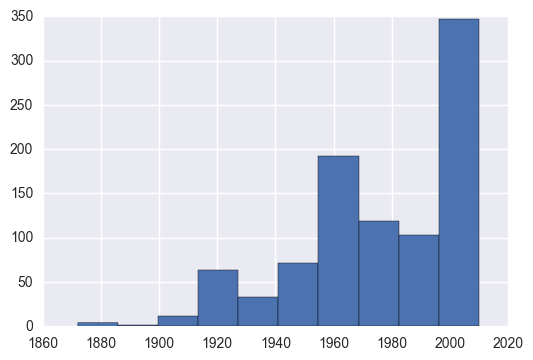

In [34]:
#Over 100 years of housing in dataset, over 61 different years of remodeling.
df['YearBuilt'].hist()

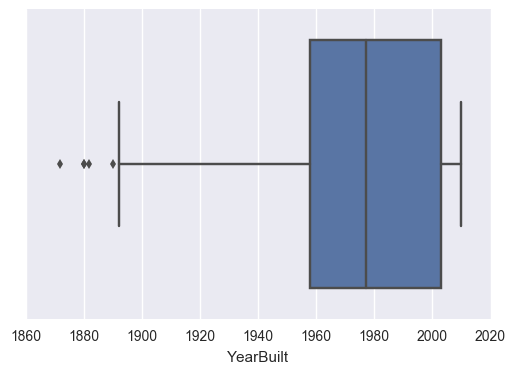

In [35]:
sns.boxplot(x='YearBuilt', data=df)

In [36]:
df[df['YearBuilt'] < 1900]

,Id,Lot,Hood,BldgType,Style,Quality,Condition,YearBuilt,YearRemod,RoofStyle,...,MonthSold,YearSold,SalePrice,Center,North,East,West,South,NoRidge,Edwards
630,631,9000,OldTown,1Fam,2Story,5,6,1880,1991,Gable,...,6,2006,124000,no,yes,yes,no,no,no,no
716,717,10800,OldTown,1Fam,2Story,7,8,1890,1998,Gable,...,7,2007,159500,no,yes,yes,no,no,no,no
991,992,17671,OldTown,1Fam,2Story,8,9,1882,1986,Gable,...,11,2009,168000,no,yes,yes,no,no,no,no
1132,1133,9900,OldTown,1Fam,2Story,6,4,1880,1950,Gable,...,5,2007,117500,no,yes,yes,no,no,no,no
1292,1293,6600,OldTown,1Fam,2Story,5,4,1892,1965,Gable,...,12,2009,107500,no,yes,yes,no,no,no,no
1349,1350,5250,OldTown,1Fam,2Story,8,5,1872,1987,Gable,...,12,2008,122000,no,yes,yes,no,no,no,no


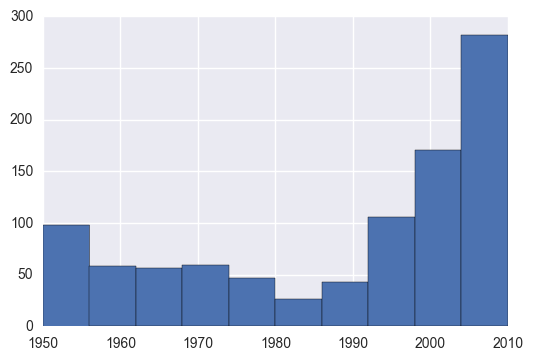

In [37]:
df['YearRemod'].hist()

In [38]:
df['RoofMatl'].value_counts()

CompShg    939
WdShngl      4
WdShake      2
ClyTile      1
Name: RoofMatl, dtype: int64

In [39]:
df = df[df['RoofMatl'] == 'CompShg']

In [40]:
df.columns

Index([u'Id', u'Lot', u'Hood', u'BldgType', u'Style', u'Quality', u'Condition',
       u'YearBuilt', u'YearRemod', u'RoofStyle', u'RoofMatl', u'AbvGroundLiv',
       u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr',
       u'MonthSold', u'YearSold', u'SalePrice', u'Center', u'North', u'East',
       u'West', u'South', u'NoRidge', u'Edwards'],
      dtype='object')

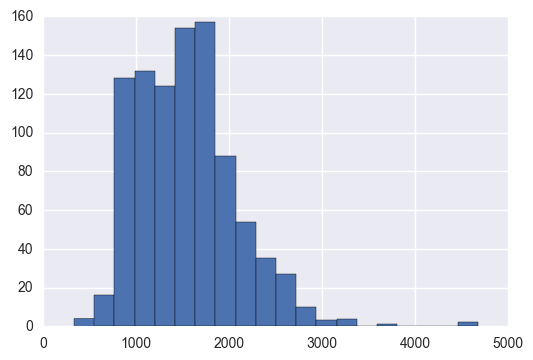

In [41]:
df['AbvGroundLiv'].hist(bins=20)

In [42]:
df = df[df['AbvGroundLiv'] < 4000]

In [43]:
df['FullBath'].value_counts()

2    514
1    401
3     20
0      2
Name: FullBath, dtype: int64

In [44]:
df = df[df['FullBath'] > 0]

In [45]:
df['HalfBath'].value_counts()

0    549
1    383
2      3
Name: HalfBath, dtype: int64

In [46]:
df = df[df['HalfBath'] <= 1]

In [47]:
df['BedroomAbvGr'].value_counts()

3    597
2    189
4    130
1     11
5      5
Name: BedroomAbvGr, dtype: int64

In [48]:
df['KitchenAbvGr'].value_counts()

1    929
2      3
Name: KitchenAbvGr, dtype: int64

In [49]:
df = df[df['KitchenAbvGr'] < 2]

In [50]:
df['MonthSold'].value_counts()

7     160
6     159
5     129
4      81
8      72
3      64
11     55
10     49
9      44
2      43
12     40
1      33
Name: MonthSold, dtype: int64

In [51]:
month_dict = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : "May",
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : "September",
    10 :'October',
    11 : 'November',
    12 : 'December'
}

df['month_sold2'] = df['MonthSold'].apply(lambda x: month_dict[x])

In [52]:
df['YearSold'].value_counts()

2009    214
2007    211
2006    201
2008    187
2010    116
Name: YearSold, dtype: int64

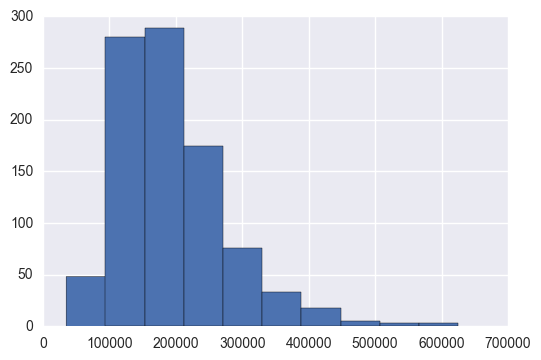

In [53]:
df['SalePrice'].hist()

In [54]:
df["Hood"].value_counts()

NAmes      159
CollgCr    134
Gilbert     70
Somerst     59
NWAmes      57
NridgHt     55
Sawyer      54
Edwards     51
OldTown     50
SawyerW     42
NoRidge     37
Timber      30
Crawfor     30
Mitchel     25
BrkSide     24
IDOTRR      14
StoneBr     13
ClearCr     12
SWISU        7
Veenker      5
Blmngtn      1
Name: Hood, dtype: int64

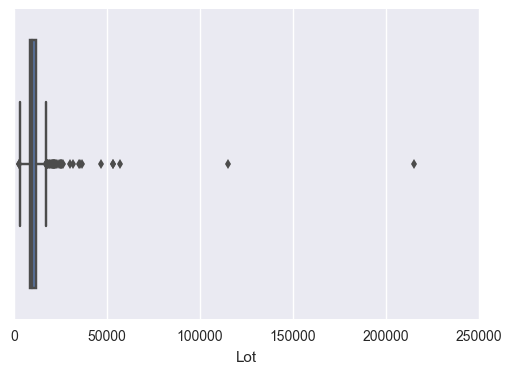

In [55]:
sns.boxplot(x='Lot', data=df)

In [56]:
df= df[df['Lot'] <100000]

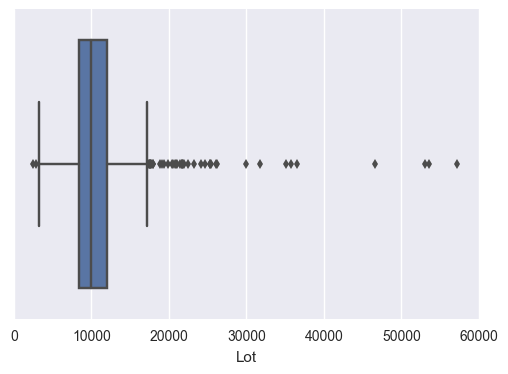

In [57]:
sns.boxplot(x='Lot', data=df)

In [58]:
df.head()

,Id,Lot,Hood,BldgType,Style,Quality,Condition,YearBuilt,YearRemod,RoofStyle,...,YearSold,SalePrice,Center,North,East,West,South,NoRidge,Edwards,month_sold2
0,1,8450,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,...,2008,208500,no,no,no,no,no,no,no,February
1,2,9600,Veenker,1Fam,1Story,6,8,1976,1976,Gable,...,2007,181500,no,no,no,no,no,no,no,May
2,3,11250,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,...,2008,223500,no,no,no,no,no,no,no,September
3,4,9550,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,...,2006,140000,no,yes,yes,no,no,no,no,February
4,5,14260,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,...,2008,250000,no,no,no,no,no,yes,no,December


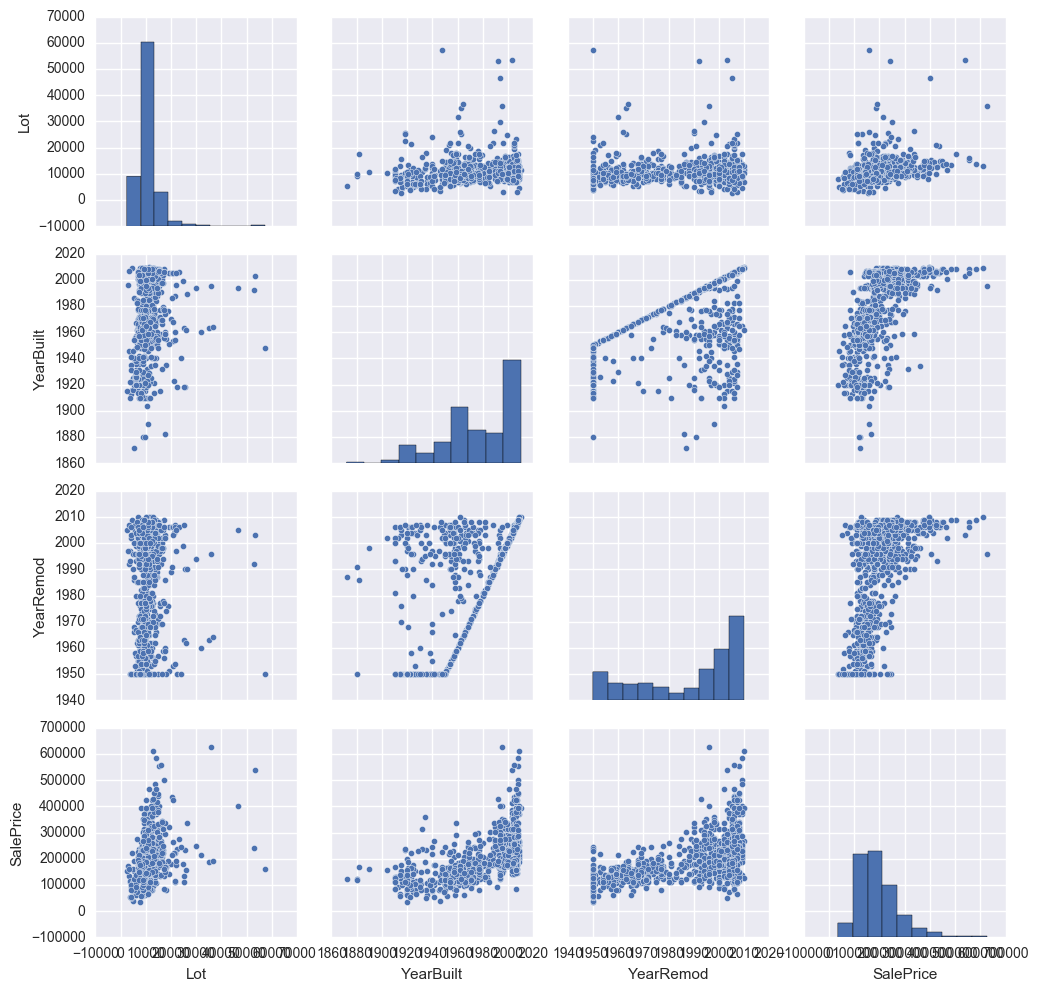

In [59]:
sns.pairplot(df[['Lot', 'YearBuilt', 'YearRemod', 'SalePrice', ]])

### II. DATA VISUALIZATION

In [60]:
#sns.pairplot(df)

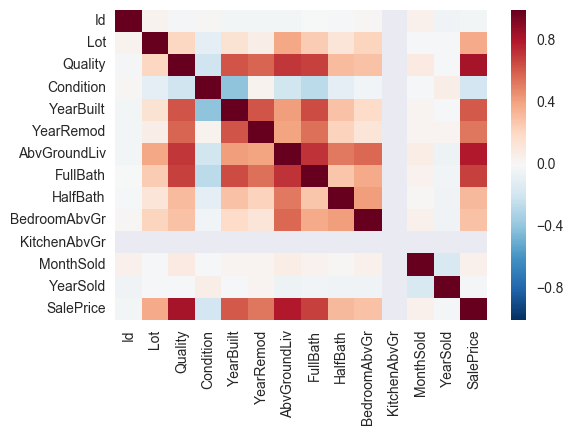

In [61]:
#Heat map reveals some strong correlations between price and the following variables: \
#...quality, Above Ground Living area. There are weak correlations between price and| 
# ...Above Ground Kitchen, Month Sold, and year sold. 
# Othe variables appear to have moderate correlations.

import seaborn as sns
sns.heatmap(df.corr())
plt.show()

# print "AbvGroundLiv Correlation:" , df['SalePrice'].corr(df['AbvGroundLiv'])
# print "Quality Correlation: ", df['SalePrice'].corr(df['Quality'])
# print "North Correlation: ", df['SalePrice'].corr(df['North_yes'])
# print "South Correlation: ", df['SalePrice'].corr(df['South_yes'])
# print "East Correlation: ", df['SalePrice'].corr(df['East_yes'])
# print "West Correlation: ", df['SalePrice'].corr(df['West_yes'])
# print "Center Correlation:", df['SalePrice'].corr(df['Center_yes'])
# print "North Ridge Correlation", df['SalePrice'].corr(df['NoRidge_yes'])
# print 'Edwards Correlation', df['SalePrice'].corr(df['Edwards_yes'])

# A .EXAMINATION OF HIGHLY CORRELATED VALUES 

## (1). Quality of Home 

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


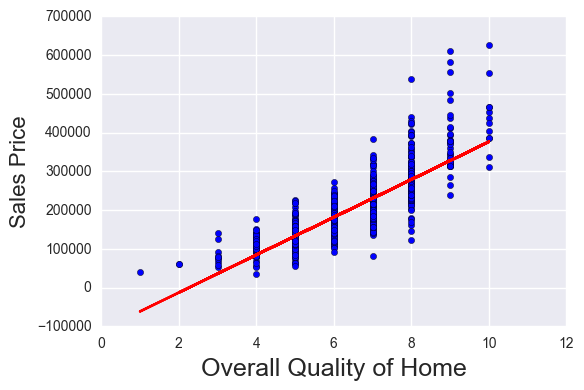

In [62]:
# There appears to be a linear relationship, between Quality and SalePrice\ 
##...though the variables are categorical and appear to have a lot of variation.
x1 = df["Quality"]
y1 = df['SalePrice']

fig, ax = plt.subplots()
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='red')
ax.scatter(x1, y1)
plt.xlabel("Overall Quality of Home", fontsize=18)
plt.ylabel('Sales Price', fontsize=16)
fig.show()

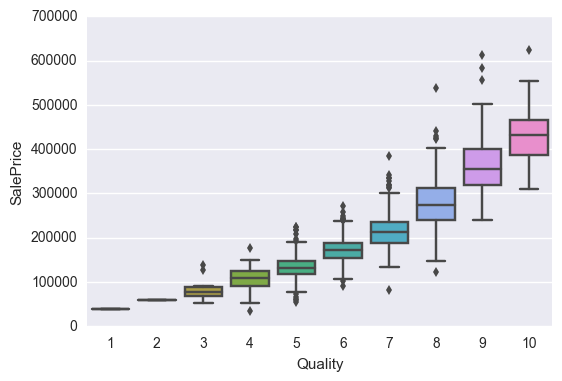

In [63]:
# A boxplot of every subcategory not only hints at a linear relationship,
# but it also shows that the better the quality, the greater the variation in price. 
#Not surprisigly, there's a big jump in the median when the quality rating of a home is over "7"\
#Interestingly, the IQR of a home with a rating of 10 overlaps with that of 9, meaning, 
#...Homes that are a 10 may sell for less than a home that's a 9.
# In fact, there are homes with a quality of 10 that are going for the same price as ...
# as homes with a quality ranking of 6, 7 & 9. 

#Hypthesis tests will help us sort this out. 

sns.boxplot(x="Quality", y="SalePrice", data=df)

In [64]:
pd.pivot_table(df, index='Quality', values = 'SalePrice', aggfunc= (np.mean,np.std, np.min, np.max,len))

,mean,std,amin,amax,len
Quality,,,,,
1,39300,NaN,39300,39300,1
2,60000,0.000000,60000,60000,2
3,84327,28094.618034,52000,139600,10
4,108380,25167.291254,34900,176000,63
5,133215,27556.490224,55993,225000,241
6,172834,31560.743677,91000,272000,210
7,215150,42375.411398,82500,383970,221
8,281742,62364.934557,122000,538000,131
9,376122,84493.965604,239000,611657,36


In [65]:
#ANOVA TEST: Sales Price relative to the Quality of a home. 

cw_lm=ols('SalePrice ~ Quality', data=df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                sum_sq     df            F         PR(>F)
Quality   4.360543e+12    1.0  2068.710424  3.911302e-238
Residual  1.949766e+12  925.0          NaN            NaN


In [66]:
#Hypothesis Test: Boxplot shows that some lower quality homes (3,4,5 &6) have overlapping IQRs. 
#Is there a meaningful difference in price?

cat1_0 = df[df['Quality']== 1]
cat1_1 = df[df['Quality']== 2]
cat1 = df[df['Quality']== 3]
cat2 = df[df['Quality']==4]
cat3 = df[df['Quality']==5]
cat4 = df[df['Quality']==6]
cat5 = df[df['Quality']==7]
cat6 = df[df['Quality']==8]
cat7 = df[df['Quality']==9]
cat8 = df[df['Quality']==10]


In [67]:
# Hypothesis testing (Two Sided) the difference in price of lower quality homes.
#FAIL TO REJECT THE null. There is no difference in mean in a home that is quality 1 or 2.

from scipy.stats import ttest_ind
tstat, pvalue = ttest_ind(cat1_0['SalePrice'], cat1_1['SalePrice'])
print('t-stat Quality Level 1 & 2:', tstat , 'p-value', pvalue)

('t-stat Quality Level 1 & 2:', nan, 'p-value', nan)


//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [68]:
# Hypothesis testing (Two Sided) the difference in price of lower quality homes.
#Reject null that mean in Quality level 3 = Quality Level 4

from scipy.stats import ttest_ind
tstat, pvalue = ttest_ind(cat1['SalePrice'], cat2['SalePrice'])
print('t-stat Quality Level 3 & 4:', tstat , 'p-value', pvalue)


('t-stat Quality Level 3 & 4:', -2.764850441807936, 'p-value', 0.007251054500708033)


In [69]:
#Reject null that mean in Quality level 4 = Quality Level 5

tstat, pvalue = ttest_ind(cat2['SalePrice'], cat3['SalePrice'])
print('t-stat Quality Level 4 & 5:', tstat , 'p-value', pvalue)

('t-stat Quality Level 4 & 5:', -6.4804606957655233, 'p-value', 3.7147816996406087e-10)


In [70]:
#Reject null that mean in Quality level 5 = Quality Level 6
tstat, pvalue = ttest_ind(cat3['SalePrice'], cat4['SalePrice'])
print('t-stat Quality Level 5 & 6:', tstat , 'p-value', pvalue)

('t-stat Quality Level 5 & 6:', -14.232662825475703, 'p-value', 3.3296380100006291e-38)


In [71]:
#Reject null that mean in Quality level 9 = Quality Level 10
tstat, pvalue = ttest_ind(cat7['SalePrice'], cat8['SalePrice'])
print('t-stat Quality Level 9 & 10:', tstat , 'p-value', pvalue)

('t-stat Quality Level 9 & 10:', -2.1616938023557348, 'p-value', 0.035880143624336655)


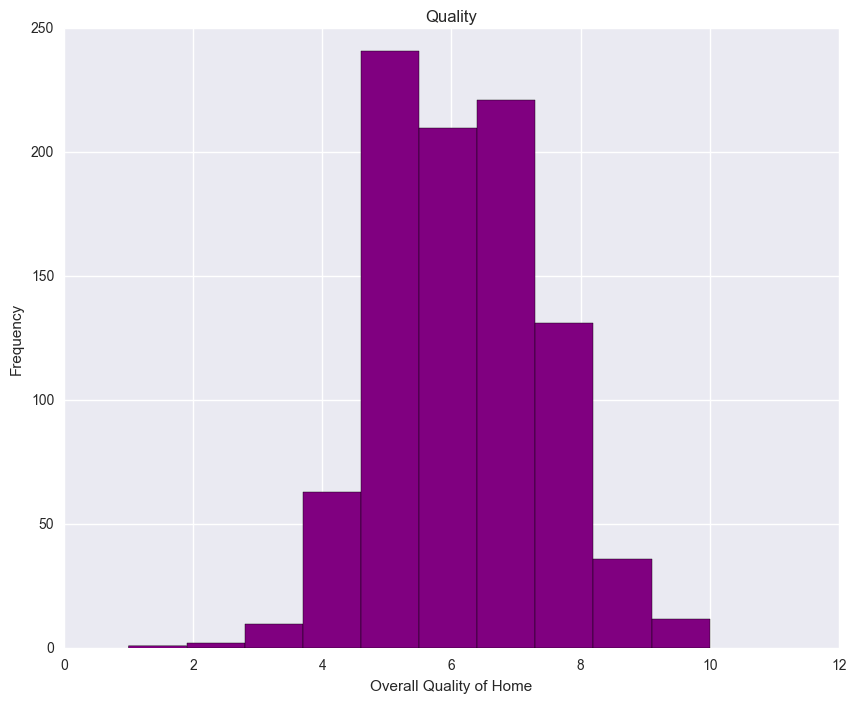

In [72]:
# Most homes sold in the data have a quality of 5 & 6.
df.hist('Quality',figsize = (10,8),bins = 10, color= "purple")
plt.xlabel('Overall Quality of Home')
plt.ylabel('Frequency')
plt.show()


## (2) Above Ground Living Area


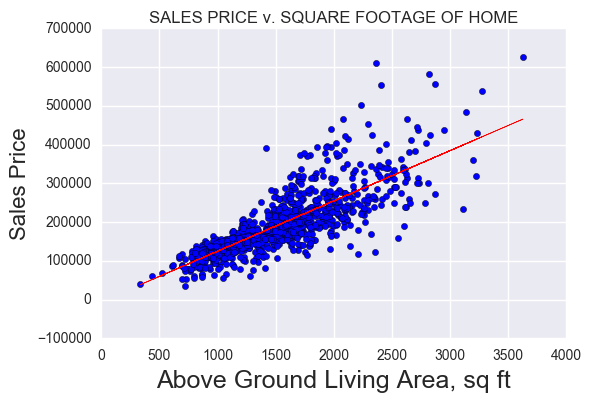

In [107]:
# There is a clear lineare relationship between sales price and the Are of an above ground 
# ...living area.

x1 = df["AbvGroundLiv"]
y1 = df['SalePrice']

fig, ax = plt.subplots()
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='red', linewidth = 0.5)
ax.scatter(x1, y1)
plt.xlabel("Above Ground Living Area, sq ft", fontsize=18)
plt.ylabel('Sales Price', fontsize=16)
plt.title("SALES PRICE v. SQUARE FOOTAGE OF HOME")
fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b0fc890>]], dtype=object)

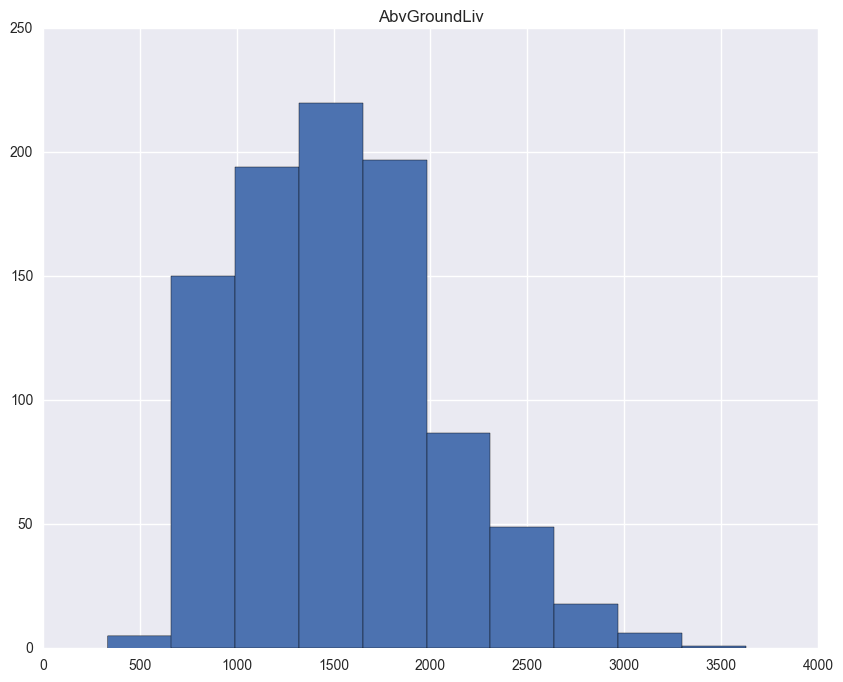

In [74]:
df.hist("AbvGroundLiv",figsize = (10,8),bins = 10)

## (3) Full Bath

Full Bath is a categorical variable. There is a relationship between the price of a home in Ames, IA and the number of full bathrooms. The swarmplot below better illustrates the distribution of the Full Bath variable. 

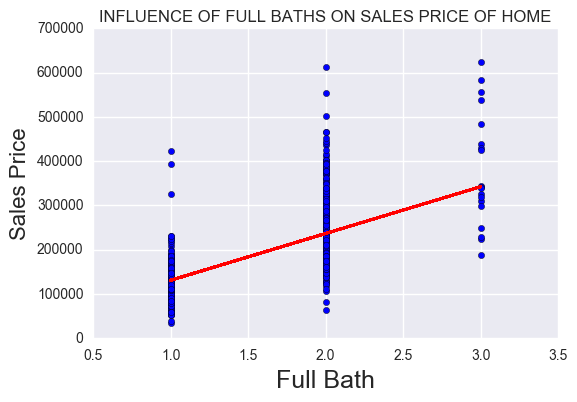

In [112]:
x1 = df["FullBath"]
y1 = df['SalePrice']

fig, ax = plt.subplots()
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='red')
ax.scatter(x1, y1)
plt.xlabel("Full Bath", fontsize=18)
plt.ylabel('Sales Price', fontsize=16)
plt.title('INFLUENCE OF FULL BATHS ON SALES PRICE OF HOME')
fig.show()

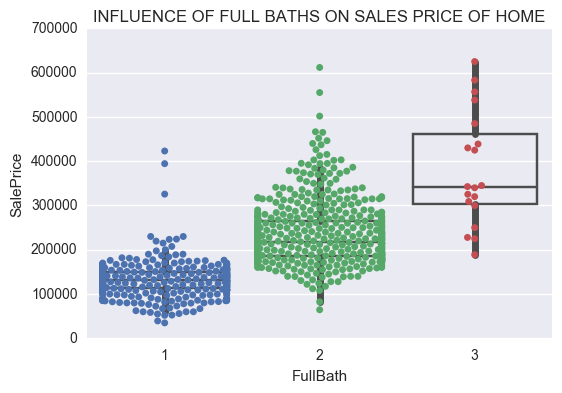

In [114]:
ax = sns.swarmplot(x="FullBath", y="SalePrice", data=df)

ax = sns.boxplot(x="FullBath", y="SalePrice", data=df,
                 showcaps=False,boxprops={'facecolor':'None'},showfliers=False,whiskerprops={'linewidth':5})
plt.title("INFLUENCE OF FULL BATHS ON SALES PRICE OF HOME")
plt.show()

## (4) Price & Neighborhood

Does location influence price? The box plot below demonstrates that prices indeed differ by neighborhood. 

Most neighborhoods in Ames have median prices below 300,000, and over half have median prices below  200,000. 

Neighbohoods, like College Creek and Crawford share similar median prices. Same withthe homes near the Old Town, Sawyer  and South & West of Iowa State neighborhoods. 

Some locations, like the Brookside neighborhood, have lower priced homes, while other neighborhoods, like North Ridge, North Ridge Heights and Stone Brook command much higher prices. 

The question now is whether this rather uniform variation in median price (100,000- 200,000 range)  will help us to better predict sale prices. 

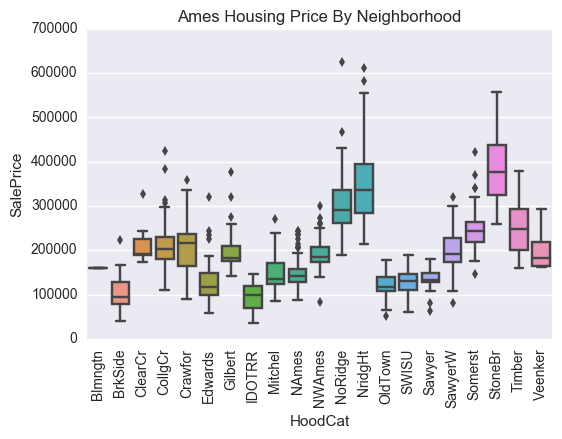

In [129]:
ax = sns.boxplot(x="HoodCat", y="SalePrice", data=df,
                 showcaps=True,showfliers=True)
plt.title("Ames Housing Price By Neighborhood")

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## (4) Above Ground Living & Quality

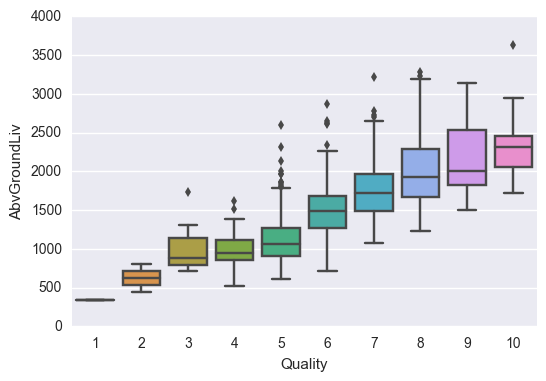

In [77]:
## Relationship Between Above Ground Living Area & Quality
sns.boxplot(x="Quality", y='AbvGroundLiv', data=df)
plt.show()

In [78]:
pd.pivot_table(df, index= 'Quality', values = 'AbvGroundLiv', aggfunc= (np.mean,np.std, len))

,mean,std,len
Quality,,,
1,334.000000,NaN,1
2,619.000000,255.972655,2
3,1012.400000,318.508747,10
4,974.730159,212.443936,63
5,1133.564315,306.553810,241
6,1506.280952,355.567425,210
7,1756.226244,361.463708,221
8,2000.053435,430.071806,131
9,2144.833333,423.895304,36


In [79]:
tstat, pvalue = ttest_ind(cat1_0['AbvGroundLiv'], cat1_1['AbvGroundLiv'])
print('t-stat Quality Level 1 & 2:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat1_1['AbvGroundLiv'], cat1['AbvGroundLiv'])
print('t-stat Quality Level 2 & 3:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat1['AbvGroundLiv'], cat2['AbvGroundLiv'])
print('t-stat Quality Level 3 & 4:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat2['AbvGroundLiv'], cat3['AbvGroundLiv'])
print('t-stat Quality Level 4 & 5:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat3['AbvGroundLiv'], cat4['AbvGroundLiv'])
print('t-stat Quality Level 4 & 5:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat4['AbvGroundLiv'], cat5['AbvGroundLiv'])
print('t-stat Quality Level 5 & 6:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat5['AbvGroundLiv'], cat6['AbvGroundLiv'])
print('t-stat Quality Level 6 & 7:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat6['AbvGroundLiv'], cat7['AbvGroundLiv'])
print('t-stat Quality Level 8 & 9:', tstat , 'p-value', pvalue)

tstat, pvalue = ttest_ind(cat7['AbvGroundLiv'], cat8['AbvGroundLiv'])
print('t-stat Quality Level 9 & 10:', tstat , 'p-value', pvalue)

#REJECT THE NULL HYPOTHESIS FOR AbvGroundLiv btw 1&2, 3&4, 8&9.

('t-stat Quality Level 1 & 2:', nan, 'p-value', nan)
('t-stat Quality Level 2 & 3:', -1.6235538100213922, 'p-value', 0.13553479619251307)
('t-stat Quality Level 3 & 4:', 0.48402995720341674, 'p-value', 0.62985427955299789)
('t-stat Quality Level 4 & 5:', -3.8741904953436963, 'p-value', 0.00013122201999277611)
('t-stat Quality Level 4 & 5:', -11.954552405839799, 'p-value', 8.6872320545373689e-29)
('t-stat Quality Level 5 & 6:', -7.2326569007626116, 'p-value', 2.1936302360205297e-12)
('t-stat Quality Level 6 & 7:', -5.693816248702821, 'p-value', 2.6328438002850683e-08)
('t-stat Quality Level 8 & 9:', -1.7943761004694319, 'p-value', 0.074583953543583506)
('t-stat Quality Level 9 & 10:', -1.5683658051930394, 'p-value', 0.12364986770824482)


## HYPO TEST SALES PRICE  & PRICE ABV GROUND LIVING


# SCATTER PLOTS COLORED BY NEIGHBORHOOD 

In [80]:
# When We look at the most expensvie homes, the range in price is extraordinary.
#... There are two homes in excess of 4000 sq feet under $200,000. 
#... thre are also two homes over 4000 sq feet over $700,000. What gives?
#The lower priced homes are in the Edwards neighborhood while the 
#... higher priced homes are in the Edwards 'hood.

BigHomes= cat8[cat8['AbvGroundLiv'] >= 4000]
BigHomes

,Id,Lot,Hood,BldgType,Style,Quality,Condition,YearBuilt,YearRemod,RoofStyle,...,YearSold,SalePrice,Center,North,East,West,South,NoRidge,Edwards,month_sold2


In [81]:
BigHomes["SalePrice"]

Series([], Name: SalePrice, dtype: int64)

In [82]:
## OOPS NEIGHBORHOOD WAS NEVER INCLUDED IN OUT CORRELATION MATRIX!
## Let's Create a new Dummy Varianle

df["HoodCat"] = df["Hood"].astype('category')
df
print type(df["HoodCat"])
print type(df['Hood'])

print df.dtypes

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Id                 int64
Lot                int64
Hood              object
BldgType          object
Style             object
Quality            int64
Condition          int64
YearBuilt          int64
YearRemod          int64
RoofStyle         object
RoofMatl          object
AbvGroundLiv       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
MonthSold          int64
YearSold           int64
SalePrice          int64
Center            object
North             object
East              object
West              object
South             object
NoRidge           object
Edwards           object
month_sold2       object
HoodCat         category
dtype: object


In [83]:
df["East"] = df["East"].astype('category')
df["West"] = df['West'].astype('category')
df["South"] = df["South"].astype('category')
df["Center"] = df["Center"].astype('category')
df["North"] = df["North"].astype('category')
df.dtypes

Id                 int64
Lot                int64
Hood              object
BldgType          object
Style             object
Quality            int64
Condition          int64
YearBuilt          int64
YearRemod          int64
RoofStyle         object
RoofMatl          object
AbvGroundLiv       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
MonthSold          int64
YearSold           int64
SalePrice          int64
Center          category
North           category
East            category
West            category
South           category
NoRidge           object
Edwards           object
month_sold2       object
HoodCat         category
dtype: object

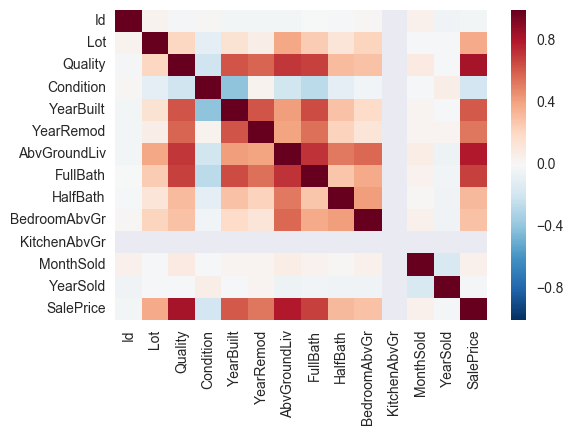

In [84]:
sns.heatmap(df.corr())
plt.show()

In [85]:
print df['Hood'].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Hood, dtype: object


In [86]:
# print pd.pivot_table(df, index='Edwards_yes', values = 'SalePrice', aggfunc= (np.mean,np.std, len))


In [87]:
# print pd.pivot_table(df, index='NoRidge_yes', values = 'SalePrice', aggfunc= (np.mean,np.std, len))



In [88]:
# cw_lm=ols('NoRidge_yes ~ Edwards_yes', data=df).fit() #Specify C for Categorical
# print(sm.stats.anova_lm(cw_lm, typ=2))

In [89]:
# cw_lm=ols('SalePrice ~ Hood', data=df).fit() #Specify C for Categorical
# print(sm.stats.anova_lm(cw_lm, typ=2))

In [90]:
# print stats.f_oneway(df['Edwards_yes'],df["NoRidge_yes"])


In [91]:
# North  = df[(df['Hood'] == 'NoRidge') | (df['Hood'] == 'Veenker') |(df['Hood'] == 'Somerst')| (df['Hood'] == 'NridgHt') | (df['Hood'] == 'NAmes')|\
# (df['Hood'] == 'Gilbert') | (df['Hood'] == 'StoneBr' ) |(df['Hood'] == 'ClearCr')|(df['Hood'] == 'Blmngtn' ) |(df['Hood'] =='BrDale')]

# East = df[(df['Hood'] == 'Crawfor') | (df['Hood'] == 'OldTown' ) |(df['Hood'] == 'BrkSide')| (df['Hood'] == 'IDOTRR') | (df['Hood'] == 'Timber')]  

# West = df[(df['Hood'] == 'NWAmes') | (df['Hood'] == 'Sawyer' ) |(df['Hood'] == 'SawyerW')| (df['Hood'] == 'Edwards') | (df['Hood'] == 'NPkVill')|(df['Hood'] == 'Blueste')]

# South = df[(df['Hood'] == 'Mitchell') | (df['Hood'] == 'MeadowV' )]

# Center = df[(df['Hood'] == 'SWISU')] 

In [92]:
# df['Hood'].dtypes

In [93]:
## Transforming other Variables

In [94]:
df.dtypes

Id                 int64
Lot                int64
Hood              object
BldgType          object
Style             object
Quality            int64
Condition          int64
YearBuilt          int64
YearRemod          int64
RoofStyle         object
RoofMatl          object
AbvGroundLiv       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
MonthSold          int64
YearSold           int64
SalePrice          int64
Center          category
North           category
East            category
West            category
South           category
NoRidge           object
Edwards           object
month_sold2       object
HoodCat         category
dtype: object

In [95]:
#Turn Objects into Categoricals
df["BldgType_Cat"] = df["BldgType"].astype('category')
df["Style_Cat"] = df["Style"].astype('category')
df["RoofStyle_Cat"] = df["RoofStyle"].astype('category')
df["RoofMatl_cat"] = df["RoofMatl"].astype('category')
df["HoodCat"] = df["Hood"].astype('category')


In [96]:
# SK LEARN PRE-PROCESSING



In [97]:
# Encoding the variable
# = df.apply(lambda x: d["HoodCat"].fit_transform("HoodCat"))

# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# # Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))

In [98]:
## Preprocessing

#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [99]:
from sklearn import preprocessing

# separate the data and target attributes


# FULL MODEL OLS 

In [100]:
# Full Model with One Categorical Neighborhood Variable
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model

model = ols("SalePrice ~ Quality + Condition+ AbvGroundLiv + HoodCat + FullBath + YearRemod + Lot + BldgType + HalfBath + KitchenAbvGr + MonthSold", df).fit()
print("Retrieving manually the parameter estimates:")
print(model._results.params)
print(model.summary())

Retrieving manually the parameter estimates:
[ -3.13099192e+05   9.43414403e+03   2.15681937e+04   2.90123593e+04
   2.52587565e+04   1.69830710e+04   2.03065731e+04  -1.90972312e+03
   1.86276331e+04   1.85603465e+04   1.33753325e+04   6.34410763e+04
   1.05158262e+05  -1.06657059e+04  -7.05684096e+03   1.86346363e+04
   2.19655074e+04   4.82441730e+04   1.37774409e+05   4.37817481e+04
   4.20508117e+04   1.76449476e+04   3.19787340e+03   6.68366699e+01
  -6.76174113e+02   2.79677907e+02   1.40213044e+00  -1.10471475e+04
  -3.13099192e+05  -8.16210076e+02]
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     206.7
Date:                Thu, 16 Feb 2017   Prob (F-statistic):               0.00
Time:                        10:46:29   L

In [130]:
#Running Model with Only Neighborhoods: Adjusted R2 of .652

modelHoods = ols("SalePrice ~ HoodCat", df).fit()
print("Retrieving manually the parameter estimates:")
print(modelHoods._results.params)
print(modelHoods.summary())

Retrieving manually the parameter estimates:
[ 159895.          -56529.375        53368.63636364   44701.01492537
   48884.56666667  -30876.37254902   35962.22857143  -66131.21428571
   -8349.          -14924.66666667   31915.52631579  152324.13513514
  191734.41818182  -40466.4         -32323.57142857  -24120.31481481
   39068.80952381   88028.40677966  233372.30769231   89465.44827586
   44305.        ]
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     87.73
Date:                Thu, 16 Feb 2017   Prob (F-statistic):          6.67e-196
Time:                        13:31:12   Log-Likelihood:                -11310.
No. Observations:                 927   AIC:                         2.266e+04
Df Residuals:                     906 

In [101]:
xs = df[['Quality', 'Condition', 'AbvGroundLiv', 'FullBath', 'YearRemod', 'Lot', 'BldgType', 'HalfBath', 'KitchenAbvGr', 'MonthSold']]
ys = df[['SalePrice']]

## fit a OLS model with intercept on TV and Radio
Xs = sm.add_constant(xs)
est = sm.OLS(ys, Xs).fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#Running Model without Neighborhoods: Drop in Adj. R^2

modelNo_Hood = ols("SalePrice ~ Quality + Condition+ AbvGroundLiv + FullBath + YearRemod + Lot + BldgType + HalfBath + KitchenAbvGr + MonthSold", df).fit()
print("Retrieving manually the parameter estimates:")
print(modelNo_Hood._results.params)
print(modelNo_Hood.summary())

In [ ]:
plt.scatter(df["SalePRice", modelNo_Hood._results.resid_)

In [ ]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=df['X'], y=df['Y'], c='k')
ax.plot(df['X'], df['OLS_Yhat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']), (row['Y'], row['OLS_Yhat']), 'r-')

In [ ]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(modelNo_Hood._results, 6, ax=ax)
ax.set_ylabel("Sale Price")
ax.set_xlabel("Full Model")
ax.set_title("Sale PriceLinear Regression")

In [ ]:
#Creating New Neightborhood Variable with Only Statistially significant Neighborhood Variables
df = pd.concat([df, pd.get_dummies(df[['HoodCat']], drop_first=True)], axis=1)


In [ ]:
df.columns

In [ ]:
#Rerunning Full Model With Neighborhood Dummies .862 Adj R^2

model = ols("SalePrice ~ Quality + Condition+ AbvGroundLiv + \
FullBath + YearRemod + Lot + BldgType + HalfBath + KitchenAbvGr + MonthSold +HoodCat_ClearCr+ \
HoodCat_CollgCr + HoodCat_Crawfor + HoodCat_Edwards + HoodCat_Gilbert+\
HoodCat_IDOTRR + HoodCat_Mitchel + HoodCat_NAmes + HoodCat_NWAmes + HoodCat_NoRidge+ \
HoodCat_NridgHt + HoodCat_OldTown + HoodCat_SWISU + HoodCat_Sawyer+ \
HoodCat_SawyerW + HoodCat_Somerst + HoodCat_StoneBr + \
HoodCat_Timber + HoodCat_Veenker", df).fit()
print("Retrieving manually the parameter estimates:")
print(model._results.params)
print(model.summary())

In [ ]:
## Modified Full Model without Full Bath-- No Improvment in R-Sq.

model_NoBath = ols("SalePrice ~ Quality + Condition+ AbvGroundLiv + \
YearRemod + Lot + BldgType + HalfBath + KitchenAbvGr + MonthSold +HoodCat_ClearCr+ \
HoodCat_CollgCr + HoodCat_Crawfor + HoodCat_Edwards + HoodCat_Gilbert+\
HoodCat_IDOTRR + HoodCat_Mitchel + HoodCat_NAmes + HoodCat_NWAmes + HoodCat_NoRidge+ \
HoodCat_NridgHt + HoodCat_OldTown + HoodCat_SWISU + HoodCat_Sawyer+ \
HoodCat_SawyerW + HoodCat_Somerst + HoodCat_StoneBr + \
HoodCat_Timber + HoodCat_Veenker", df).fit()
print("Retrieving manually the parameter estimates:")
print(model_NoBath._results.params)
print(model_NoBath.summary())

### III. SKLEARN Regression Using Quality and Above Ground Living Area

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# variables = ['HoodCat', 'BldgType_Cat', 'Style_Cat', 'RoofStyle_Cat', 'RoofMatl_cat']

# for area in areas:
#     df = pd.concat([df, pd.get_dummies(df[variables], drop_first=True)], axis=1)


In [ ]:
df.columns

In [ ]:
lm = LinearRegression(normalize = True)

Xs = df[['YearBuilt', 'YearRemod']]
ys = df[['SalePrice']]

lm.fit(Xs,ys)

## FULL MODEL 

In [ ]:
lmf = LinearRegression(normalize = True)

Xfull = df[['Quality','AbvGroundLiv','FullBath','NoRidge_yes', 'NoRidge_yes', \
            'HoodCat_BrkSide', 'HoodCat_ClearCr',\
            'HoodCat_CollgCr', u'HoodCat_Crawfor', u'HoodCat_Edwards',\
            'HoodCat_Gilbert', u'HoodCat_IDOTRR', u'HoodCat_Mitchel',\
            'HoodCat_NAmes', 'HoodCat_NWAmes', 'HoodCat_NoRidge',\
            'HoodCat_NridgHt', 'HoodCat_OldTown', 'HoodCat_SWISU',\
            'HoodCat_Sawyer', 'HoodCat_SawyerW', 'HoodCat_Somerst',\
            'HoodCat_StoneBr', 'HoodCat_Timber', 'HoodCat_Veenker']]


#df[['YearRemod','KitchenAbvGr','AbvGroundLiv','Style','RoofStyle', 'FullBath',\
            #'Lot', 'HalfBath', \
            #'BldgType_Cat', 'Style_Cat', 'RoofStyle_Cat', 'RoofMatl_cat']]

yfull =df[['SalePrice']]

lmf.fit(Xfull,yfull)

In [ ]:
lmf.coef_

In [ ]:
lmf.intercept_

In [ ]:
predictionsf = lmf.predict(Xfull)

In [ ]:
from sklearn.metrics import r2_score

y_true = yfull
y_pred = lmf.predict(Xfull)

lr_r2 =  r2_score(y_true=y_true, y_pred=y_pred)

In [ ]:
lr_r2

In [ ]:
plt.scatter(predictionsf, yfull)

plt.title('Actual vs Predicted')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.plot([0,600000], [0,600000])

## PARTIAL MODEL

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
lmP = LinearRegression(normalize = True)

Xpart = df[['Quality','AbvGroundLiv','FullBath']]


#df[['YearRemod','KitchenAbvGr','AbvGroundLiv','Style','RoofStyle', 'FullBath',\
            #'Lot', 'HalfBath', \
            #'BldgType_Cat', 'Style_Cat', 'RoofStyle_Cat', 'RoofMatl_cat']]

ypart =df[['SalePrice']]

lmP.fit(Xpart,ypart)

In [ ]:
lmP.coef_

In [ ]:
lmP.intercept_

In [ ]:
predictionsP = lmP.predict(Xpart)

In [ ]:
plt.scatter(predictionsP, ys)

plt.title('Actual vs Predicted')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.plot([0,600000], [0,600000])

In [ ]:
y_trueP = ypart
y_predP = lmP.predict(Xpart)

lr_r2P =  r2_score(y_true=y_trueP, y_pred=y_predP)
lr_r2P

## PARTIAL MODEL

In [ ]:
lm = LinearRegression(normalize = True)

Xs = df[['YearBuilt', 'YearRemod']]
ys = df[['SalePrice']]

lm.fit(Xs,ys)

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
predictions = lm.predict(Xs)

In [ ]:
plt.scatter(predictions, ys)

plt.title('Actual vs Predicted')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.plot([0,600000], [0,600000])

# FULL MODEL --TEST TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xfull, yfull, random_state = 144)

In [ ]:
X_train.head(1)

In [ ]:
lmSplit = LinearRegression(normalize = True)

lmSplit.fit(X_train, y_train)

In [ ]:
lmSplit.coef_

In [ ]:
lmSplit.intercept_

In [ ]:
y_trueSplit = y_train
y_predSplitTrain = lmSplit.predict(X_train)

lr_r2Split =  r2_score(y_true=y_trueSplit, y_pred=y_predSplitTrain)
print "R2 Train Set:", lr_r2Split

In [ ]:
y_predSplitTest = lmSplit.predict(X_test)

plt.scatter(y_test, y_predSplitTest)

In [ ]:
plt.scatter(y_predSplitTest, y_test)

plt.title('Actual vs Predicted Test Set')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.plot([0,600000], [0,600000])

In [ ]:
y_trueSplitT = y_test
y_predSplitT = lmSplit.predict(X_test)

lr_r2Split =  r2_score(y_true=y_trueSplitT, y_pred=y_predSplitT)
print "R2 Test Set:", lr_r2Split

## THE TEST SET GIVES US A .88 R2.


In [ ]:
y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)

## Cross Validation

## Lasso gives us a lower R2 on the TRAIN but Higher R2 on the Test .8833!!!!!

In [ ]:
# we'll use LASSO, aka L1
lasso = linear_model.Lasso(alpha=5)

In [ ]:
lasso_model = lasso.fit(X_train, y_train)

In [ ]:
y_true_lasso = y_train
y_pred_lasso = lasso_model.predict(X_train)

lasso_r2 =  r2_score(y_true=y_true_lasso, y_pred=y_pred_lasso)
lasso_r2

In [ ]:
# Test on Test Set
y_true_lasso_Test = y_test
y_pred_lasso_Test = lasso_model.predict(X_test)

lasso_r2 =  r2_score(y_true=y_true_lasso_Test, y_pred=y_pred_lasso_Test)
lasso_r2

In [ ]:
lasso_tts = linear_model.Lasso(alpha=.07)
tts_model = lasso_tts.fit(X_train, y_train)

tts_lasso_r2 =  r2_score(y_true=y_test, y_pred=tts_model.predict(X_test))

print 'original lasso r2:', lasso_r2
print 'tts lasso r2:     ', tts_lasso_r2

## RIDGE

In [ ]:
rcv = linear_model.RidgeCV(alphas=(.001, .001, .01, .1, .5, 1, 5, 10),store_cv_values=True,)

In [ ]:
#Fitting Model
rcv_model = rcv.fit(X_train, y_train)

In [ ]:
rcv_r2 =  rcv_model.score(X_train, y_train)
rcv_r2

In [ ]:
rcv_model.alpha_

In [ ]:
ridge_tts = linear_model.RidgeCV(alphas=(.001, .001, .01, .1, .5, 1, 5, 10),store_cv_values=True)
tts_ridge = lasso_tts.fit(X_train, y_train)

tts_ridge =  r2_score(y_true=y_test, y_pred=tts_model.predict(X_test))

print 'original lasso r2:', lasso_r2
print 'tts lasso r2:     ', tts_lasso_r2

y_true_Ridge = y_test
y_pred_Ridge = rcv_r2.predict(X_test)

Ridge_Test_r2 =  r2_score(y_true=y_true_Ridge, y_pred=y_pred_Ridge)
lasso_Test_r2

##   Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lmSplit, X_train, y_train, n_jobs=1, cv=5)

In [ ]:
cross_val_score(lmSplit, X_train, y_train, n_jobs=1, cv=5).mean()

In [ ]:
cross_val_score(lasso, X_train, y_train, n_jobs=1, cv=5).mean()

In [ ]:

#MSE 
cross_val_score(lmSplit, X_train, y_train, n_jobs=1, cv=5,
                scoring='neg_mean_squared_error').mean()

In [ ]:
#MSE Lasso
cross_val_score(lasso, X_train, y_train, n_jobs=1, cv=5,
                scoring='neg_mean_squared_error').mean()

## BACKGROUND CODE

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xfull, ys, random_state = 144)

In [ ]:
X_train.head()

In [ ]:
lm = LinearRegression(normalize = True)

lm.fit(X_train, y_train)

In [ ]:
#Do a bar chart
lm.coef_

In [ ]:
y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [ ]:
# fit the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
22 % 3